In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

In [2]:
bound = 1 #  boundary of interval 
n = 5 # number of app. points  

In [3]:
def f(x):
    return x**4 + np.sin(x)

xt - points on which we will app. our function

In [4]:
def get_xt(f, bound=bound, n=n):
    x = np.linspace(bound, -bound, n)
    return (f(x), x)

In [5]:
def plot_ogiginal_function(bound=bound, n=n):
    x = np.linspace(bound, -bound, 1000)
    
    plt.plot(x, f(x))
    
    # app. point
    xt = get_xt(f, bound, n)
    for i in range(len(xt[0])):
        plt.plot(xt[1][i], xt[0][i], 'ro')

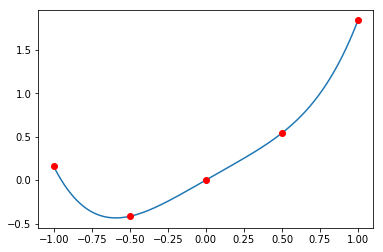

In [6]:
plot_ogiginal_function()

### Polynomial

Our goal is to find coeeficients $\bar{a_{j}}$ so polynomial $P_{m}(x)=\sum_{j=0}^{m} \bar{a_{j}} \varphi_{j}(x)$ which minimizes squared deviation among polynomial $P_m(x, a)$ from ${f(x)}$. So we need 

$$\sigma(a, y)=\sum_{i=0}^{n}\left(P_{m}\left(x_{i}\right)-y_{i}\right)^{2}, \quad \delta(a, y)=\sqrt{\frac{\sigma(a, y)}{n+1}}$$ 

And 

$$ \bar{a}= arg\min _{a} \delta(a, y)$$

We can solve find $\bar{a}$ knowing that $\left.\frac{\partial \sigma(a, y)}{\partial a_{k}}\right|_{a=\bar{a}}=0, \quad k=\overline{0, m}$

Let

$$Q=\left(\begin{array}{cccc}{\varphi_{0}\left(x_{0}\right),} & {\varphi_{1}\left(x_{0}\right),} & {\$$dots} & {\varphi_{m}\left(x_{0}\right)} \\ {\varphi_{0}\left(x_{1}\right),} & {\varphi_{1}\left(x_{1}\right),} & {\dots} & {\varphi_{m}\left(x_{1}\right)} \\ {\cdots} & {\dots} & {\dots} & {\dots} \\ {\varphi_{0}\left(x_{n}\right),} & {\varphi_{1}\left(x_{n}\right),} & {\dots} & {\varphi_{m}\left(x_{n}\right)}\end{array}\right)$$

So 

$$\begin{aligned} \sigma(a, y) &=\|Q a-y\|^{2}=(Q a-y, Q a-y)=(Q a, Q a)-2(Q a, y)+(y, y)=\left(a, Q^{T} Q a\right)-2\left(a, Q^{T} y\right)+\|y\|^{2} \end{aligned}$$

So to find parametrs we just need to solve following system of equasions

$$H a=b, \quad \text { where } \quad H=Q^{T} Q, \quad b=Q^{T} y$$

In [7]:
power_of_polynom = 3

In [8]:
def f_p(x, a):
    s = 0
    for i in range(len(a)):
        s += a[i] * x ** i
    return s

In [9]:
def get_Q(x, power_of_polynom=power_of_polynom):
    Q = np.zeros((len(x), power_of_polynom+1))
    for i in range(len(x)):
        for j in range(power_of_polynom+1):
            Q[i][j] = x[i] ** j
    return Q

In [10]:
def get_coefs_p(bound=bound, power_of_polynom=power_of_polynom, n=n):
    yt, xt = get_xt(f, bound, n)

    Q = get_Q(xt, power_of_polynom)

    H = Q.T @ Q
    b = Q.T @ yt

    c = np.linalg.solve(H, b)
    return c

In [11]:
get_coefs_p()

array([-0.12857143,  0.99797777,  1.10714286, -0.15650679])

In [12]:
def plot_app_p(bound=bound, n=n, power_of_polynom=power_of_polynom):
    plot_ogiginal_function(bound, n)
    
    coefs = get_coefs_p(bound, power_of_polynom, n)
    
    x = np.linspace(bound, -bound, 1000)
    plt.plot(x, f_p(x, coefs))
    
    x = get_xt(f, bound, n)[1]

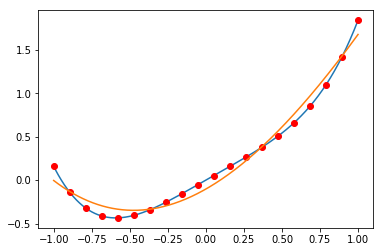

In [13]:
plot_app_p(power_of_polynom=3, n=20)

### Legendre polynomials 

Formula for lagendre polynomials is following: 

$$L_{n}(x)=\frac{1}{2^{n} \cdot n !} \frac{d^{n}}{d x^{n}}\left[\left(x^{2}-1\right)^{n}\right]$$

I dont know how to programm it properly (not using symbols bc they are slow), so i hardcoded first 4, which is exact amount i need to get ploynomial of power 3.

$$c_{k}=\frac{\int_{a}^{b}p(x) f(x) Q_{k}(x) d x}{\int_{a}^{b} p(x) Q_{k}^{2}(x) d x}$$

And for legandre polynomial $p(x)=1, x \in[-1,1]$

And i dont know how to programm it properly, so i hardcoded first 4, which is exact amount i need to get ploynomial of power 3

In [14]:
def L_0(x):
    return 1

In [15]:
def L_1(x):
    return x

In [16]:
def L_2(x):
    return 0.5 * (3 * x ** 2 - 1)

In [17]:
def L_3(x):
    return 0.125 * (5 * x ** 3 - 3 * x)

In [18]:
def c_0(a):
    #return (((a ** 3)/3-np.cos(a)) - (((-a) ** 3)/3-np.cos(-a))) / 2*a
    return integrate.quad(lambda x: f(x)*L_0(x), -a, a)[0] / integrate.quad(lambda x: L_0(x)**2, -a, a)[0]

In [19]:
def c_1(a):
    #return ((a**4/4+np.sin(a)-a*np.cos(a)) - (a**4/4+np.sin(-a)+a*np.cos(-a)))/(2*a**3/3)
    return integrate.quad(lambda x: f(x)*L_1(x), -a, a)[0] / integrate.quad(lambda x: L_1(x)**2, -a, a)[0]

In [20]:
def c_2(a):
    #return (((3.5-1.5*a**2)*np.cos(a)+0.3*a**5-0.166666667*a**3+3*a*np.sin(a)) - ((3.5-1.5*a**2)*np.cos(-a)+0.3*(-a)**5-0.166666667*(-a)**3+3*(-a)*np.sin(-a))) / ((0.45*a**5-0.5*a**3+0.25*a) - (0.45*(-a)**5-0.5*(-a)**3+0.25*(-a)))
    return integrate.quad(lambda x: f(x)*L_2(x), -a, a)[0] / integrate.quad(lambda x: L_2(x)**2, -a, a)[0]

In [21]:
def c_3(a):
    #return ((0.104167*a**6-0.09375*a**4+(4.125*a-0.625*a**3)*np.cos(a)+(1.875*a**2-4.125)*np.sin(a)) - (0.104167*a**6-0.09375*a**4+(4.125*(-a)-0.625*(-a)**3)*np.cos(-a)+(1.875*a**2-4.125)*np.sin(-a))) / ((0.0558036*a**7-0.09375*a**5+0.046875*a**3)-(0.0558036*(-a)**7-0.09375*(-a)**5+0.046875*(-a)**3))
    return integrate.quad(lambda x: f(x)*L_3(x), -a, a)[0] / integrate.quad(lambda x: L_3(x)**2, -a, a)[0]

In [22]:
L = [L_0, L_1, L_2, L_3]
C = [c_0, c_1, c_2, c_3]

In [23]:
def f_L(x, coefs):
    assert len(coefs) < 5, "I only hardcoded 4 :("
    
    s = 0
    for i in range(len(coefs)):
        s += L[i](x) * coefs[i]
    return s

In [24]:
def get_coefs_l(bound=bound, power_of_polynom=power_of_polynom):
    assert power_of_polynom < 4, "I only hardcoded 4 :("
    
    c = [c(bound) for c in C[:power_of_polynom+1]]
    return c

In [25]:
def plot_app_l(bound=bound, n=n, power_of_polynom=power_of_polynom):
    assert power_of_polynom < 4, "I only hardcoded 4 :("
    
    plot_ogiginal_function(bound, n)
    
    coefs = get_coefs_l(bound, power_of_polynom)
    
    x = np.linspace(bound, -bound, 1000)
    plt.plot(x, f_L(x, coefs))

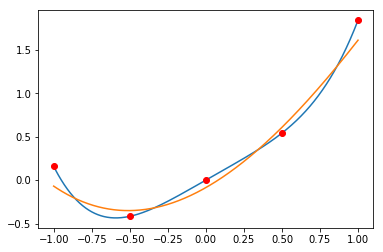

In [26]:
plot_app_l(power_of_polynom=3, n=5)